## Loan default Project

Importing packages

In [14]:
import pandas as pd
from pandas_profiling import ProfileReport
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import miceforest as mf
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Reading data in 

In [15]:
data = pd.read_csv("Loan_Default.csv")

In [16]:
original_df = data.copy()

first look through data

In [17]:
data.shape

(148670, 34)

In [18]:
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [19]:
data.describe(include = "number")

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [21]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [22]:
data.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

### Boxplots

<AxesSubplot:xlabel='Status', ylabel='Upfront_charges'>

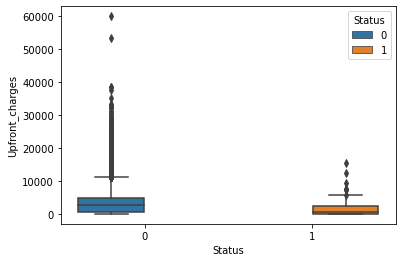

In [23]:
sns.boxplot(x ="Status", y = 'Upfront_charges',hue = 'Status', data = data)

<AxesSubplot:xlabel='income', ylabel='Count'>

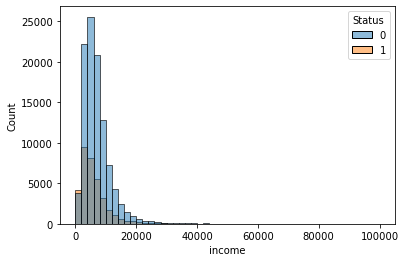

In [24]:
sns.histplot(data=data, x = 'income',hue = 'Status', bins = 50, binrange = (0,100000))

<AxesSubplot:xlabel='LTV', ylabel='Count'>

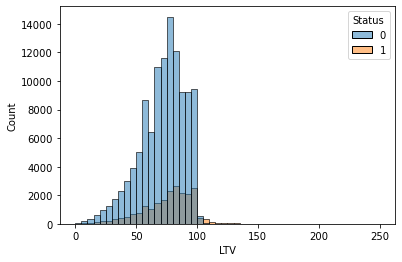

In [25]:
sns.histplot(data=data, x = 'LTV',hue = 'Status', bins = 50, binrange = (0,250))

<AxesSubplot:xlabel='credit_type', ylabel='Count'>

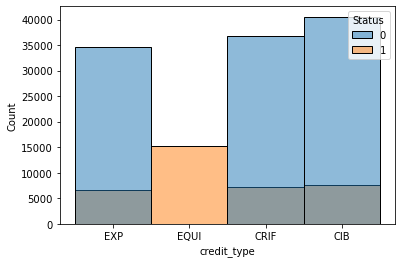

In [26]:
sns.histplot(data=data, x = 'credit_type',hue = 'Status', bins = 30)

In [27]:
data['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [28]:
data["Gender"].replace("Sex Not Available", np.NaN, inplace = True)

In [29]:
data['approv_in_adv'].unique()

array(['nopre', 'pre', nan], dtype=object)

In [30]:
data['loan_type'].unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [31]:
data['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

In [32]:
data["age"].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [33]:
data["Region"].unique()

array(['south', 'North', 'central', 'North-East'], dtype=object)

In [34]:
data["total_units"].unique()

array(['1U', '2U', '3U', '4U'], dtype=object)

In [35]:
data["LTV"].unique()

array([ 98.72881356,          nan,  80.01968504, ..., 151.8145161 ,
        41.49550706,  32.80201342])

In [36]:
data["term"].unique()

array([360., 300., 180., 312., 144., 240., 348., 324., 120.,  96., 192.,
       156., 228., 336., 288., 108., 276.,  nan, 132., 216., 168., 204.,
       264., 252., 165., 280., 322.])

<AxesSubplot:>

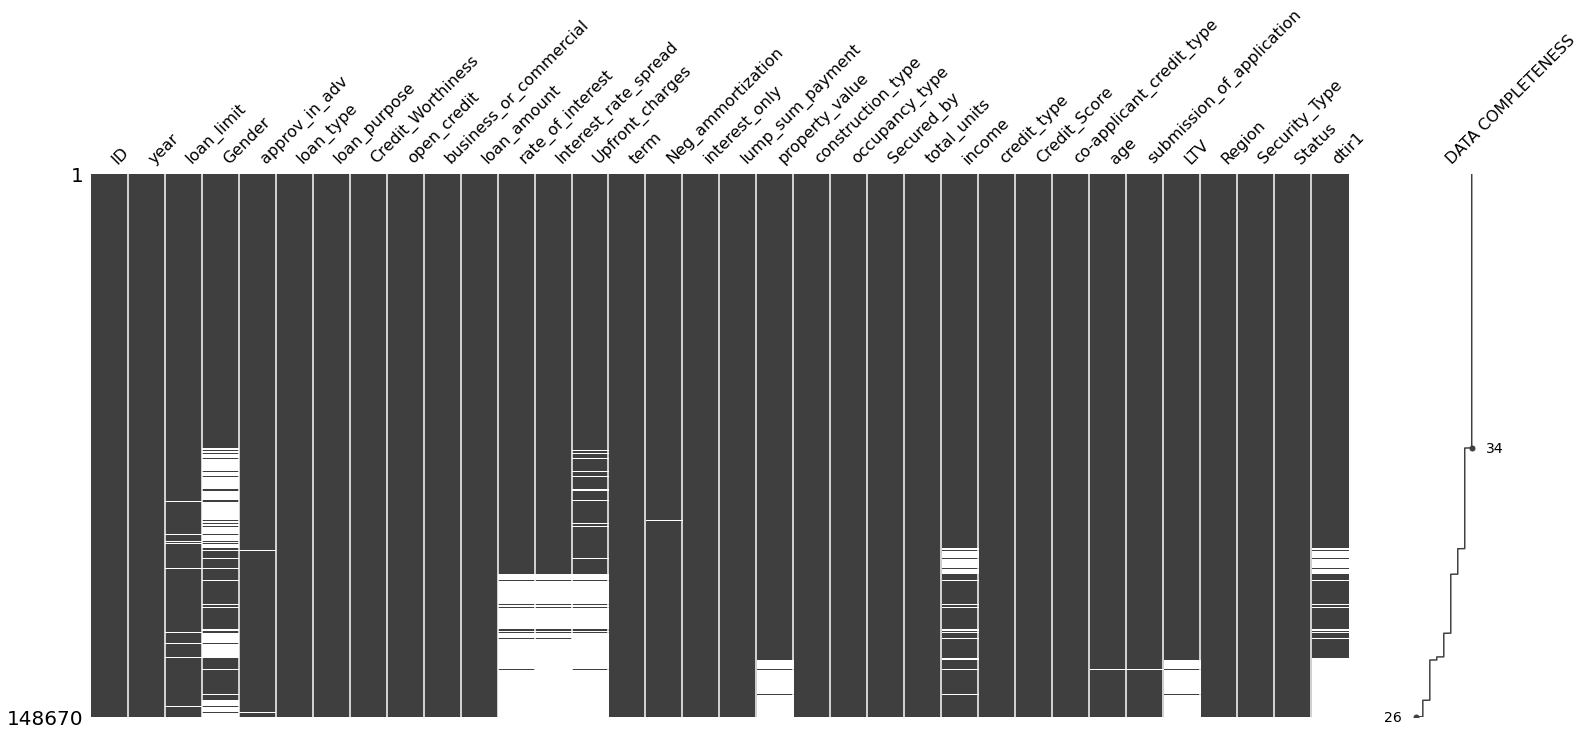

In [37]:
msno.matrix(data, labels=True, sort = "descending")

In [38]:
#msno.matrix(data_comp, labels=True, sort = "descending")

In [39]:
data.drop(["ID","year"], axis =1, inplace = True)

In [40]:
# sns.pairplot(data, hue = 'Status')

In [41]:
#sns.pairplot(data_num)

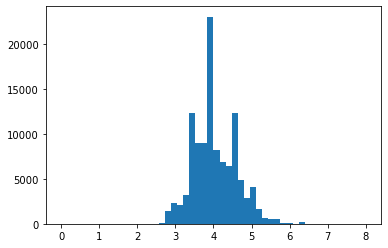

In [42]:
roi_original = plt.hist(data["rate_of_interest"],50)

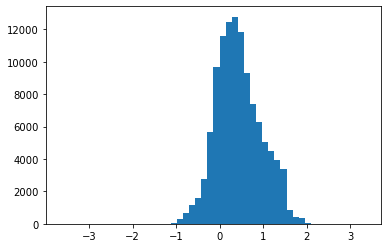

In [43]:
irs_original = plt.hist(data["Interest_rate_spread"],50)

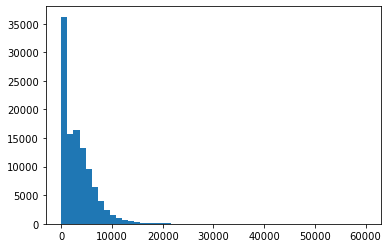

In [44]:
ufc_original = plt.hist(data['Upfront_charges'],50)

#### converting object columns to categorical 

In [45]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype("category")

### Data Imputation using Miceforest

In [46]:
kds = mf.ImputationKernel(
data,
datasets = 1,
save_all_iterations = True,
random_state =7040)

kds.mice(2)

In [47]:
data_comp = kds.complete_data(dataset=0, inplace =False)

In [48]:
data_comp.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

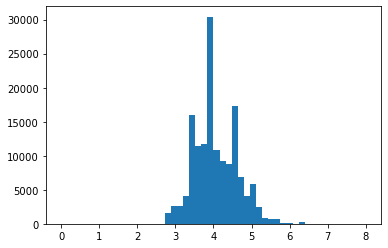

In [49]:
roi_comp = plt.hist(data_comp["rate_of_interest"],50)

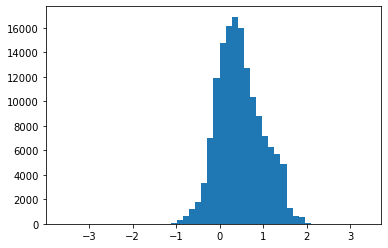

In [50]:
irs_comp= plt.hist(data_comp["Interest_rate_spread"],50)

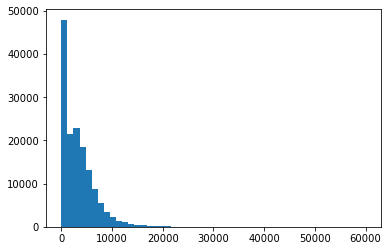

In [51]:
ufc_original = plt.hist(data_comp['Upfront_charges'],50)

In [52]:
data_comp.describe(include = "number")

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.00000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,3.311177e+05,4.068505,0.474083,3292.708881,335.12100,4.978386e+05,6909.826327,699.789103,72.918520,0.246445,38.029273
std,1.839093e+05,0.558839,0.512598,3327.675433,58.42512,3.669623e+05,6368.317969,115.875857,38.363888,0.430942,10.751626
min,1.650000e+04,0.000000,-3.638000,0.000000,96.00000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.105025,650.000000,360.00000,2.680000e+05,3720.000000,599.000000,60.817308,0.000000,31.000000
50%,2.965000e+05,3.990000,0.421800,2668.990000,360.00000,4.180000e+05,5700.000000,699.000000,75.240385,0.000000,39.000000
75%,4.365000e+05,4.500000,0.816900,4849.880000,360.00000,6.180000e+05,8460.000000,800.000000,86.375661,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.00000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [53]:
data.describe(include = "number")

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [54]:
data.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

### Feature Selection

#### Transforming categorical data and running k best to find best features

In [55]:
data_comp.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Female,nopre,type1,p1,l1,nopc,nob/c,116500,4.750,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.375,...,EQUI,552,EXP,55-64,to_inst,75.568182,North,direct,1,27.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [56]:
data_cat = data_comp.select_dtypes(include = 'category')

In [57]:
data_num = data_comp.select_dtypes(include = 'number')

In [58]:
data_cat.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Female,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


#### Creating 2 datasets one with one hot encoding and the other without OHE

In [59]:
data_catWE = pd.get_dummies(data_cat, drop_first = True)

In [60]:
data_catWE.head()

,loan_limit_ncf,Gender_Joint,Gender_Male,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
le = LabelEncoder()

In [62]:
data_catWO = data_cat.apply(le.fit_transform)

In [63]:
data_catWO.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0,0,0,0,0,0,0,1,1,1,...,1,1,0,0,3,0,0,1,3,1
1,0,2,0,1,0,0,0,0,1,1,...,1,1,0,0,2,1,3,1,0,1
2,0,2,1,0,0,0,0,1,0,1,...,1,1,0,0,3,0,1,1,3,1
3,0,2,0,0,3,0,0,1,1,1,...,1,1,0,0,3,0,2,0,0,1
4,0,1,1,0,0,0,0,1,1,1,...,1,1,0,0,1,1,0,0,0,1


In [64]:
data_num.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,116500,4.750,0.8593,1062.94,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,206500,4.375,1.3645,7010.00,360.0,338000.0,4980.0,552,75.568182,1,27.0
2,406500,4.560,0.2000,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,456500,4.250,0.6810,0.00,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,696500,4.000,0.3042,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0


#### Combining Dataframes Together with OHE

In [65]:
DataWE = pd.concat([data_num, data_catWE], axis=1)

In [66]:
WEX = DataWE.iloc[:, DataWE.columns!='Status']
WEY = DataWE['Status']

#### Combining Dataframes Together without OHE

In [67]:
DataWO = pd.concat([data_num, data_catWO], axis =1)

In [68]:
WOX = DataWO.iloc[:, DataWO.columns!='Status']
WOY = DataWO['Status']

#### Creating Training and Test Data

In [69]:
Ex_train, Ex_test, Ey_train, Ey_test = train_test_split(WEX,WEY, test_size= .5)

In [70]:
Ox_train, Ox_test, Oy_train, Oy_test = train_test_split(WOX,WOY, test_size= .5)

#### Running Decision Tree with all variables 

In [71]:
clf = RandomForestClassifier(n_estimators=100)
clf2 = RandomForestClassifier(n_estimators=100)

In [72]:
clf.fit(Ex_train, Ey_train)
clf2.fit(Ox_train, Oy_train)

RandomForestClassifier()

In [73]:
Ey_pred = clf.predict(Ex_test)
Oy_pred = clf2.predict(Ox_test)

### accuracy

In [74]:
print("Accuracy:",metrics.accuracy_score(Ey_test, Ey_pred))
print("Accuracy:",metrics.accuracy_score(Oy_test, Oy_pred))

Accuracy: 0.8879397322929979
Accuracy: 0.8901459608528957


#### f1 Score

In [75]:
print("with encoder f1 Score:",metrics.f1_score(Ey_test, Ey_pred))
print("without encoder f1 Score:",metrics.f1_score(Oy_test, Oy_pred))

with encoder f1 Score: 0.7210875242750954
without encoder f1 Score: 0.7267251188006159


#### Important features

In [76]:
feature_impE = pd.Series(clf.feature_importances_,index=Ex_train.columns).sort_values(ascending=False)

In [77]:
feature_impE.head(20)

credit_type_EQUI                     0.257996
LTV                                  0.070028
income                               0.069922
dtir1                                0.062442
Interest_rate_spread                 0.055181
Upfront_charges                      0.049846
property_value                       0.048473
Credit_Score                         0.046862
loan_amount                          0.045057
rate_of_interest                     0.039688
lump_sum_payment_not_lpsm            0.023729
co-applicant_credit_type_EXP         0.021407
Neg_ammortization_not_neg            0.017547
credit_type_EXP                      0.017292
credit_type_CRIF                     0.014931
Gender_Joint                         0.014714
term                                 0.011505
Gender_Male                          0.010786
loan_type_type3                      0.009370
submission_of_application_to_inst    0.008896
dtype: float64

In [78]:
feature_impO = pd.Series(clf2.feature_importances_,index=Ox_train.columns).sort_values(ascending=False)

In [79]:
feature_impO.head(20)

credit_type                  0.250228
income                       0.076834
LTV                          0.074544
dtir1                        0.067056
Interest_rate_spread         0.061265
Upfront_charges              0.053189
property_value               0.049739
Credit_Score                 0.049634
loan_amount                  0.046764
rate_of_interest             0.042652
Gender                       0.027858
co-applicant_credit_type     0.026427
lump_sum_payment             0.024933
age                          0.024127
Neg_ammortization            0.019187
loan_purpose                 0.017590
loan_type                    0.015106
term                         0.011455
Region                       0.011278
submission_of_application    0.009516
dtype: float64

In [80]:
metrics.confusion_matrix(Oy_test, Oy_pred)

array([[55311,   814],
       [ 7352, 10858]], dtype=int64)

In [81]:
metrics.confusion_matrix(Ey_test, Ey_pred)

array([[55237,   718],
       [ 7612, 10768]], dtype=int64)

In [82]:
data_comp['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

### Improving model 

In [83]:
new_var = feature_impO.head(20).index.array

In [84]:
clf3 = RandomForestClassifier(n_estimators=100)

In [85]:
new_train = Ox_train[new_var]
new_test = Ox_test[new_var]

In [86]:
clf3.fit(new_train,Oy_train)

RandomForestClassifier()

In [87]:
new_pred =clf3.predict(new_test)

In [88]:
print("Accuracy:",metrics.accuracy_score(Oy_test, new_pred))

Accuracy: 0.8891101096387973


In [89]:
print("f1 Score:",metrics.f1_score(Oy_test, new_pred))

f1 Score: 0.7248205641796027


In [90]:
metrics.confusion_matrix(Oy_test,new_pred)

array([[55236,   889],
       [ 7354, 10856]], dtype=int64)

In [91]:
New_feature_imp = pd.Series(clf3.feature_importances_,index=new_train.columns).sort_values(ascending=False)

In [92]:
New_feature_imp.head(20)

credit_type                  0.268415
income                       0.080721
LTV                          0.076319
dtir1                        0.067828
Interest_rate_spread         0.063922
Upfront_charges              0.055815
Credit_Score                 0.052662
property_value               0.050147
loan_amount                  0.048049
rate_of_interest             0.042529
co-applicant_credit_type     0.029448
lump_sum_payment             0.025413
Gender                       0.024995
age                          0.023866
loan_type                    0.019816
Neg_ammortization            0.019319
loan_purpose                 0.017283
term                         0.013542
Region                       0.011108
submission_of_application    0.008803
dtype: float64

### Reducing hyperparameter range using RandomizedsearchCV

In [93]:
# creating hyperparameter ranges

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [94]:
random_grid

{'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [93]:
clf_rand = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = clf_rand, param_distributions = random_grid, n_iter = 100,
                               cv = 5, verbose = 2, n_jobs = -1)

In [94]:
from datetime import datetime
start_time = datetime.now()
# do your work here

rf_random.fit(new_train, Oy_train)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Duration: 0:25:21.470782


In [87]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [97]:
best_random = rf_random.best_estimator_

In [103]:
def evaluate(model, testx, testy ):
    predictions = model.predict(testx)
    accuracy = metrics.accuracy_score(testy,predictions)
    f1score = metrics.f1_score(Oy_test, Oy_pred)
    print("Accuracy:",accuracy)
    print("F1 Score:", f1score)
    return metrics.confusion_matrix(Oy_test,predictions)

In [104]:
evaluate(best_random, new_test, Oy_test)

Accuracy: 0.8902535817582565
F1 Score: 0.7292638544251447


array([[54933,  1009],
       [ 7149, 11244]], dtype=int64)

In [105]:
evaluate(clf3, new_test, Oy_test)

Accuracy: 0.8875899643505751
F1 Score: 0.7292638544251447


array([[55042,   900],
       [ 7456, 10937]], dtype=int64)

### Using grid search cv

In [109]:
gridrf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = gridrf, param_grid = param_grid, 
                           cv =3, n_jobs = -1, verbose=2)

In [110]:
start_time = datetime.now()

best_grid = grid_search.fit(new_train, Oy_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Duration: 0:27:20.361430


In [112]:
best_grid.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [111]:
evaluate(best_random, new_test, Oy_test)

Accuracy: 0.8902535817582565
F1 Score: 0.7292638544251447


array([[54933,  1009],
       [ 7149, 11244]], dtype=int64)